In [1]:
# Needed libraries 
# Reference Material - https://www.kaggle.com/code/gauravduttakiit/time-series-forecasting-using-naive-method
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 5]

In [4]:
df = pd.read_pickle('df_timeseries.pickle')

In [5]:
# Create the dataframe for the naive forecast
df_naive = df.copy()
        

df_naive.groupby(['nprb_id','dst_addr'])

#Extracting the results of one probe and destination
df_naive = df_naive[(df_naive['nprb_id'] == 'es1') & (df_naive['dst_addr'] == "52.46.200.93")]

In [6]:
# using the naive forecast 
naive_prediction = df_naive['avg'].shift(periods=1,fill_value=0)
naive_prediction.name = "forecast_avg"

In [7]:
# concat the shifted row and the original dataframe
df_naive = pd.concat([df_naive.reset_index(drop=True),naive_prediction.reset_index(drop=True)], axis=1)
df_naive

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,timestamp,msm_name,from,type,group_id,step,stored_timestamp,nprb_id,new_time,forecast_avg
0,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-16 10:15:30,Ping,18.100.6.236,ping,48819913,300,1673864259,es1,2023-01-16 11:17:39,0.000000
1,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-16 10:20:34,Ping,18.100.6.236,ping,48819913,300,1673864518,es1,2023-01-16 11:21:58,51.726077
2,5080,2.6.2,39,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-16 10:25:41,Ping,18.100.6.236,ping,48819913,300,1673864814,es1,2023-01-16 11:26:54,51.025667
3,5080,2.6.2,48,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-16 10:30:41,Ping,18.100.6.236,ping,48819913,300,1673865112,es1,2023-01-16 11:31:52,51.706424
4,5080,2.6.2,0,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-16 10:35:42,Ping,18.100.6.236,ping,48819913,300,1673865422,es1,2023-01-16 11:37:02,51.052043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,5080,2.6.2,42,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-18 08:50:40,Ping,18.100.6.236,ping,48819913,300,1674031922,es1,2023-01-18 09:52:02,48.715062
560,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-18 08:55:37,Ping,18.100.6.236,ping,48819913,300,1674032203,es1,2023-01-18 09:56:43,54.746530
561,5080,2.6.2,35,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-18 09:00:37,Ping,18.100.6.236,ping,48819913,300,1674032511,es1,2023-01-18 10:01:51,54.792445
562,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,2023-01-18 09:05:38,Ping,18.100.6.236,ping,48819913,300,1674032810,es1,2023-01-18 10:06:50,54.728991


In [8]:
# split training and test data 
train = df_naive.loc[df_naive['new_time'] <= '2023-01-18']
test = df_naive.loc[df_naive['new_time'] >= '2023-01-18']

In [9]:
# compare the shifted row and the original row 

forecast_Series = naive_prediction[-123:]
forecast_Series.name = "forecast_avg"

feature_Series = test['avg']
feature_Series.name = 'feature_avg'

compare_df = pd.concat([feature_Series.reset_index(drop=True),forecast_Series.reset_index(drop=True)], axis=1)
compare_df


,feature_avg,forecast_avg
0,48.662406,50.630757
1,50.622346,48.662406
2,50.576749,50.622346
3,54.370250,50.576749
4,54.563369,54.370250
...,...,...
118,54.746530,48.715062
119,54.792445,54.746530
120,54.728991,54.792445
121,48.711529,54.728991


In [10]:

# Testing the prediction accuracy 
se = (compare_df['forecast_avg'] - compare_df['feature_avg']) ** 2 
se.mean()

12.28576024766421

In [11]:
se = (df_naive['avg'].values - naive_prediction.values)** 2 
se.mean()

14.999386268839

(array([19375.        , 19375.04166667, 19375.08333333, 19375.125     ,
        19375.16666667, 19375.20833333, 19375.25      , 19375.29166667,
        19375.33333333, 19375.375     , 19375.41666667]),
 [Text(19375.0, 0, '01-18 00'),
  Text(19375.041666666668, 0, '01-18 01'),
  Text(19375.083333333332, 0, '01-18 02'),
  Text(19375.125, 0, '01-18 03'),
  Text(19375.166666666668, 0, '01-18 04'),
  Text(19375.208333333332, 0, '01-18 05'),
  Text(19375.25, 0, '01-18 06'),
  Text(19375.291666666668, 0, '01-18 07'),
  Text(19375.333333333332, 0, '01-18 08'),
  Text(19375.375, 0, '01-18 09'),
  Text(19375.416666666668, 0, '01-18 10')])

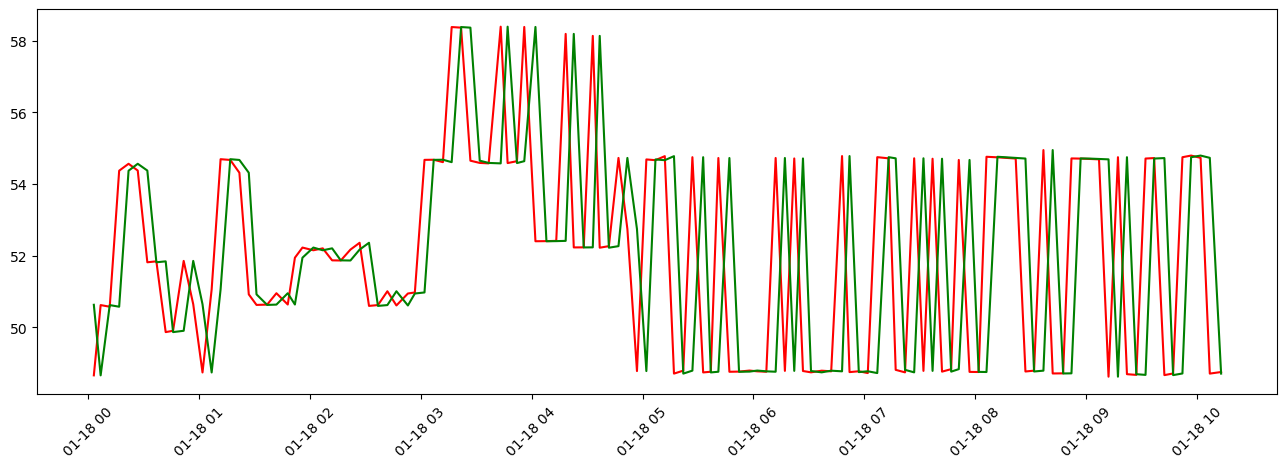

In [12]:
# visualising the values 

plt.plot(test["new_time"],test["avg"],color='r')
plt.plot(test["new_time"],test["forecast_avg"],color='g')
plt.xticks(rotation=45)